# Multi-dimensional stuff

1. Compute and plot multi-dimensional functions
2. Contour plot
3. Compute and plot gradients
4. Compute eigenvalues of a matrix
5. Check gradient of a function using finite differences

[[1.  0.4]
 [0.4 2. ]]


<IPython.core.display.Javascript object>


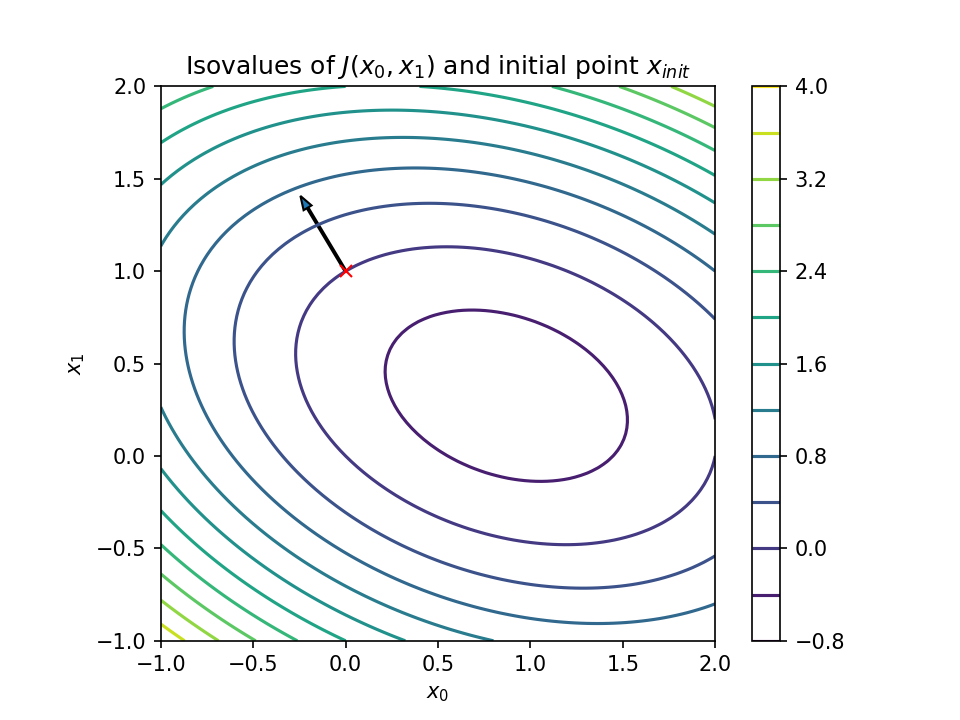

In [2]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from ipywidgets import *
%matplotlib notebook

A = np.array([[1.0,0.4],[0.4,2]])
print(A)
b = np.array([1,1])
x0 = np.array([0,1])


def J(x):
    return 0.5*np.dot(x,A@x)-np.dot(b,x)
def GradJ(x):
    return A@x-b

# Contour plotting

plt.figure()
xmin=-1
xmax=2
ymin=-1
ymax=2
aX0=np.linspace(xmin,xmax,100)
aX1=np.linspace(ymin,ymax,100)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])

plt.contour(aX0,aX1,Z,12)
levels = np.arange(0,0.1)
plt.plot(x0[0],x0[1],'rx')
plt.axis('scaled')
plt.colorbar()
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Isovalues of $J(x_0,x_1)$ and initial point $x_{init}$')

dx = GradJ(x0)
dx = 0.4*dx/np.sqrt(dx[0]**2+dx[1]**2)
plt.arrow(x0[0], x0[1], dx[0], dx[1],width=0.01,head_width=0.05) 

plt.show()

In [23]:
# Eigenvalues and eigenvectors
import numpy.linalg as la
v = la.eigvals(A)  # only eigenvalues
print("Eigenvalues: ",v)
v= la.eigvalsh(A)  # only values - symmetric or Hermitian matrices
print("Eigenvalues: ",v)
w, v = la.eig(A)  # eigenvalues + eigenvectors - general matrices
print("Eigenvalues: ",w)
print("Eigenvectors: ",v)
w, v = la.eigh(A) # eigenvalues + eigenvectors - symmetric or Hermitian matrices
print("Eigenvalues: ",w)
print("Eigenvectors: ",v)

Eigenvalues:  [0.85968758 2.14031242]
Eigenvalues:  [0.85968758 2.14031242]
Eigenvalues:  [0.85968758 2.14031242]
Eigenvectors:  [[-0.94362832 -0.33100694]
 [ 0.33100694 -0.94362832]]
Eigenvalues:  [0.85968758 2.14031242]
Eigenvectors:  [[-0.94362832  0.33100694]
 [ 0.33100694  0.94362832]]


In [5]:
L = la.cholesky(A)  # Choleski decomposition
print(L)
print(A)
print("L^T*L=",L@L.transpose())  # check that the Choleski holds

[[1.       0.      ]
 [0.4      1.356466]]
[[1.  0.4]
 [0.4 2. ]]
L^T*L= [[1.  0.4]
 [0.4 2. ]]


In [55]:
# This block tells you how to check if you implemented the right formula for the gradient
# You should always perform a test like this if you notice that a gradient based optimization algorithm
# does not seem to work as expected.

def f(x):
    return x[0]**3+5*(x[0]-x[1])**2

def gradf(x):
    return np.array([3*x[0]**2+10*(x[0]-x[1]),-10*(x[0]-x[1])])

def Hessf(x):
    return np.array([[6*x[0]+10,-10],[-10,10]])

def wronggradf(x):
    return np.array([3*x[0]**2+10*(x[0]-x[1]),-5*(x[0]-x[1])])

def wrongHessf(x):
    return np.array([[6*x[0]+10,-5],[-5,10]])

def CheckGrad(f,gradf,x0,d=np.random.rand(2)):
    # check the gradient using finite differences:
    epst = 1e-6
    print("Direction: ",d)

    val     = f(x0)
    g       = gradf(x0)
    vplus   = f(x0+epst*d)
    vminus  = f(x0-epst*d)

    # Directional derivative at x0 in direction d
    print("Analytic gradient in direction d: ",np.dot(d,g))
    # Finite differences test
    print("Finite differences test in dir d: ",(vplus-vminus)/(2*epst))

x0   = np.array([1,2]) # some random point

print("Finite differences test with the correct gradient")
CheckGrad(f,gradf,x0)
print(" ")

print("Finite differences test with the wrong gradient")
CheckGrad(f,wronggradf,x0)

print(" ")
print("If you see that the test with a random direction says that the gradient is wrong you can check the coordinate directions:")
print(" ")

print("Check for the first coordinate:")
CheckGrad(f,wronggradf,x0,d=np.array([1,0]))

print(" ")
print("Check for the second coordinate:")
CheckGrad(f,wronggradf,x0,d=np.array([0,1]))

print(" ")
print(" ... and identify where the error lies!")


Finite differences test with the correct gradient
Direction:  [0.2543809 0.5650907]
Analytic gradient in direction d:  3.8702406950253305
Finite differences test in dir d:  3.8702406945922974
 
Finite differences test with the wrong gradient
Direction:  [0.2543809 0.5650907]
Analytic gradient in direction d:  1.0447872146145298
Finite differences test in dir d:  3.8702406945922974
 
If you see that the test with a random direction says that the gradient is wrong you can check the coordinate directions:
 
Check for the first coordinate:
Direction:  [1 0]
Analytic gradient in direction d:  -7
Finite differences test in dir d:  -7.000000000534357
 
Check for the second coordinate:
Direction:  [0 1]
Analytic gradient in direction d:  5
Finite differences test in dir d:  10.000000000509601
 
 ... and identify where the error lies!


In [57]:
def CheckHess(f,Hessf,x0,d=np.random.rand(2)):
    # check the gradient using finite differences:
    epst = 1e-4
    print("Direction: ",d)

    val     = f(x0)
    g       = gradf(x0)
    vplus   = f(x0+epst*d)
    vminus  = f(x0-epst*d)
    
    H = Hessf(x0)

    # Directional second derivative at x0 in direction d
    print("Second derivative in direction d  : ",np.dot(H@d,d))
    # Finite differences test
    print("Finite differences second der test: ",(vplus+vminus-2*val)/(epst**2))
    
# Check with the correct Hessian    
CheckHess(f,Hessf,x0)

print(" ")
# Check with the wrong Hessian
CheckHess(f,wrongHessf,x0)


Direction:  [0.97756215 0.21860181]
Second derivative in direction d  :  11.493974403040074
Finite differences second der test:  11.49397412802955
 
Direction:  [0.97756215 0.21860181]
Second derivative in direction d  :  13.630942972791075
Finite differences second der test:  11.49397412802955


In [70]:
def CheckHessGrad(gradf,Hessf,x0,d=np.random.rand(2)):
    # check the gradient using finite differences:
    epst = 1e-4
    print("Direction: ",d)

    g       = gradf(x0)
    gplus   = gradf(x0+epst*d)
    gminus  = gradf(x0-epst*d)
    
    H = Hessf(x0)

    # Directional second derivative at x0 in direction d
    print("Second derivative in direction d  : ",(gplus-gminus)/(2*epst))
    # Finite differences test
    print("Finite differences second der test: ",H@d)

print("An example where this works: ")
CheckHessGrad(gradf,Hessf,x0)
print(" ")

print("An example where the Hessian is wrong")
CheckHessGrad(gradf,wrongHessf,x0)
print(" ")

print("Test again by coordinate directions to identify where the error lies:")

CheckHessGrad(gradf,wrongHessf,x0,d=np.array([1,0]))
CheckHessGrad(gradf,wrongHessf,x0,d=np.array([0,1]))



An example where this works: 
Direction:  [0.22236616 0.69782177]
Second derivative in direction d  :  [-3.42035903  4.75455602]
Finite differences second der test:  [-3.42035903  4.75455602]
 
An example where the Hessian is wrong
Direction:  [0.22236616 0.69782177]
Second derivative in direction d  :  [-3.42035903  4.75455602]
Finite differences second der test:  [0.0687498  5.86638684]
 
Test again by coordinate directions to identify where the error lies
Direction:  [1 0]
Second derivative in direction d  :  [ 16. -10.]
Finite differences second der test:  [16 -5]
Direction:  [0 1]
Second derivative in direction d  :  [-10.  10.]
Finite differences second der test:  [-5 10]
